# Population in Ireland

# Adım 1: Veri Ön İşleme ve Temizleme

## 1. Veri setinin yüklenmesi ve temel kontrol

In [3]:
import pandas as pd               # We use pandas for data analysis and processing.
import numpy as np                # We use numpy for multi-dimensional arrays and mathematical operations.
import seaborn as sns             # We use seaborn for a high-level interface for data visualization.
import matplotlib.pyplot as plt   # We use matplotlib.pyplot for creating plots and graphs.
%matplotlib inline                # We enable the inline backend for matplotlib in Jupyter notebooks.
sns.set(color_codes=True)         # We configure seaborn to use color codes for enhanced visualization.


UsageError: unrecognized arguments: # We enable the inline backend for matplotlib in Jupyter notebooks.


In [4]:
import math                       # We import the math module for access to mathematical functions.
from scipy.stats import poisson   # We import the poisson object to work with Poisson statistical functions.
from scipy.stats import binom     # 

In [5]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [6]:
df=pd.read_csv("PEA01-3.csv")     # we read dataset

In [7]:
df.head(5)                        # We dispplay first 5 rows

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,0 - 14 years,Both sexes,Thousand,NaN
1,Population Estimates (Persons in April),1950,0 - 14 years,Male,Thousand,434.6
2,Population Estimates (Persons in April),1950,0 - 14 years,Female,Thousand,416.6
3,Population Estimates (Persons in April),1950,15 - 24 years,Both sexes,Thousand,452.6
4,Population Estimates (Persons in April),1950,15 - 24 years,Male,Thousand,234.9


In [8]:
df.tail(5)                        # Displays the last 5 rows

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
1327,Population Estimates (Persons in April),2023,65 years and over,Male,Thousand,379.9
1328,Population Estimates (Persons in April),2023,65 years and over,Female,Thousand,426.4
1329,Population Estimates (Persons in April),2023,All ages,Both sexes,Thousand,5281.6
1330,Population Estimates (Persons in April),2023,All ages,Male,Thousand,2606.2
1331,Population Estimates (Persons in April),2023,All ages,Female,Thousand,2675.4


In [9]:
df.sample(5)                       # We select a random sample of 5 rows

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
542,Population Estimates (Persons in April),1980,0 - 14 years,Female,Thousand,504.9
886,Population Estimates (Persons in April),1999,15 - 24 years,Male,Thousand,327.5
299,Population Estimates (Persons in April),1966,45 - 64 years,Female,Thousand,297.0
1290,Population Estimates (Persons in April),2021,65 years and over,Both sexes,Thousand,747.4
279,Population Estimates (Persons in April),1965,45 - 64 years,Both sexes,Thousand,602.6


In [10]:
total_rows = df.shape[0]                 # We assign the number of rows to "total_rows"
total_columns = df.shape[1]              # We assign the number of columns to "total_columns"
print(f"Total Rows= {total_rows}")       # We print the total number of rows
print(f"Total Columns= {total_columns}") # We print the total number of columns

Total Rows= 1332
Total Columns= 6


In [11]:
df.describe()                            # We get a statistical summary of numerical columns

,Year,VALUE
count,1332.000000,1318.000000
mean,1986.500000,808.058877
std,21.368032,868.888579
min,1950.000000,149.300000
25%,1968.000000,310.775000
50%,1986.500000,477.700000
75%,2005.000000,870.475000
max,2023.000000,5281.600000


In [12]:
df.describe(include="object")            # We get a summary of columns with categorical data

,STATISTIC Label,Age Group,Sex,UNIT
count,1332,1332,1332,1332
unique,1,6,3,1
top,Population Estimates (Persons in April),0 - 14 years,Both sexes,Thousand
freq,1332,222,444,1332


In [13]:
df.dtypes                               # We check the data types of each column

STATISTIC Label     object
Year                 int64
Age Group           object
Sex                 object
UNIT                object
VALUE              float64
dtype: object

## 2. Temizlik ve veri önişleme 

In [14]:
df.nunique()                            # We count the number of unique values in each column of the dataframe

STATISTIC Label       1
Year                 74
Age Group             6
Sex                   3
UNIT                  1
VALUE              1214
dtype: int64

In [15]:
df.count()                               # We count non-null values in each column of the dataframe

STATISTIC Label    1332
Year               1332
Age Group          1332
Sex                1332
UNIT               1332
VALUE              1318
dtype: int64

In [16]:
df.isnull().sum()                        # We count the number of null values in each column of the dataframe

STATISTIC Label     0
Year                0
Age Group           0
Sex                 0
UNIT                0
VALUE              14
dtype: int64

In [17]:
df.duplicated().sum()                    # We find the total number of duplicated rows in the dataframe

0

In [18]:
# We remove columns with only one unique value as they won't be useful for analysis
to_drop = ["STATISTIC Label", "UNIT"]

# We drop the specified columns from the dataframe and apply changes directly with inplace=True.
df.drop(columns=to_drop, inplace=True)

In [19]:
df = df.rename(columns={"VALUE": "Value"}) # We rename 'VALUE' to 'Value' to match the naming style of other columns.

In [20]:
# We convert values from thousands to millions, since we dropped the 'UNIT' column which specified the unit.
df["Value"] = (df["Value"] / 1000)

In [21]:
missing_df = df[df.isna().any(axis=1)] # We create a new dataframe containing only the rows with missing data.
missing_df # We display the dataframe with missing values.


,Year,Age Group,Sex,Value
0,1950,0 - 14 years,Both sexes,NaN
72,1954,0 - 14 years,Both sexes,NaN
216,1962,0 - 14 years,Both sexes,NaN
234,1963,0 - 14 years,Both sexes,NaN
360,1970,0 - 14 years,Both sexes,NaN
396,1972,0 - 14 years,Both sexes,NaN
522,1979,0 - 14 years,Both sexes,NaN
576,1982,0 - 14 years,Both sexes,NaN
684,1988,0 - 14 years,Both sexes,NaN
774,1993,0 - 14 years,Both sexes,NaN


In [22]:
# We sum the 'Value' for 'Male' and 'Female' for each year and age group to understand the combined total.
grouped_values = df[(df['Sex'] == 'Male') | (df['Sex'] == 'Female')].groupby(['Year', 
                                                                              'Age Group'])['Value'].sum().reset_index()

# We then use these totals to fill in missing 'Value' data for the 'Both sexes' category.
for index, row in grouped_values.iterrows():
    year = row['Year']
    age_group = row['Age Group']
    total_value = row['Value']
    # Here, we're iterating over each summed total to locate where we need to fill in data.

    # We're filling in the missing 'Value' fields for 'Both sexes' with the totals we've calculated.
    df.loc[(df['Year'] == year) & (df['Age Group'] == age_group) & 
           (df['Sex'] == 'Both sexes') & (df['Value'].isna()), 'Value'] = total_value
    # This step ensures that our data is complete and accurate for both individual sexes and combined.

# Finally, we're checking our results to make sure everything looks good.
print(df) # By printing the dataframe, we can visually confirm that the missing values have been properly filled in.


      Year          Age Group         Sex   Value
0     1950       0 - 14 years  Both sexes  0.8512
1     1950       0 - 14 years        Male  0.4346
2     1950       0 - 14 years      Female  0.4166
3     1950      15 - 24 years  Both sexes  0.4526
4     1950      15 - 24 years        Male  0.2349
...    ...                ...         ...     ...
1327  2023  65 years and over        Male  0.3799
1328  2023  65 years and over      Female  0.4264
1329  2023           All ages  Both sexes  5.2816
1330  2023           All ages        Male  2.6062
1331  2023           All ages      Female  2.6754

[1332 rows x 4 columns]


In [23]:
# Her yıl ve yaş grubu için 'Male' ve 'Female' cinsiyetlerinin 'Value' değerlerini toplayın
grouped_values = df[(df['Sex'] == 'Male') | (df['Sex'] == 'Female')].groupby(['Year', 'Age Group'])['Value'].sum().reset_index()

# 'Both sexes' için eksik 'Value' değerlerini bu toplamlarla doldurun
for index, row in grouped_values.iterrows():
    year = row['Year']
    age_group = row['Age Group']
    total_value = row['Value']

    # Eksik değerleri toplam değerle doldurun
    df.loc[(df['Year'] == year) & (df['Age Group'] == age_group) & (df['Sex'] == 'Both sexes') & (df['Value'].isna()), 'Value'] = total_value

# Sonuçları kontrol edin
print(df)


      Year          Age Group         Sex   Value
0     1950       0 - 14 years  Both sexes  0.8512
1     1950       0 - 14 years        Male  0.4346
2     1950       0 - 14 years      Female  0.4166
3     1950      15 - 24 years  Both sexes  0.4526
4     1950      15 - 24 years        Male  0.2349
...    ...                ...         ...     ...
1327  2023  65 years and over        Male  0.3799
1328  2023  65 years and over      Female  0.4264
1329  2023           All ages  Both sexes  5.2816
1330  2023           All ages        Male  2.6062
1331  2023           All ages      Female  2.6754

[1332 rows x 4 columns]


In [24]:
# We're filtering our dataset to get all records where the 'Age Group' is '0 - 14 years'.
all_0_14 = df[(df["Age Group"] == "0 - 14 years")]

# Now, 'all_0_14' holds the subset of the data for that specific age group.
all_0_14  # We display this filtered subset to review it.


,Year,Age Group,Sex,Value
0,1950,0 - 14 years,Both sexes,0.8512
1,1950,0 - 14 years,Male,0.4346
2,1950,0 - 14 years,Female,0.4166
18,1951,0 - 14 years,Both sexes,0.8548
19,1951,0 - 14 years,Male,0.4364
...,...,...,...,...
1297,2022,0 - 14 years,Male,0.5190
1298,2022,0 - 14 years,Female,0.4953
1314,2023,0 - 14 years,Both sexes,1.0116
1315,2023,0 - 14 years,Male,0.5165


In [25]:
import ipywidgets as widgets
from IPython.display import display

# Identify options
year_option = df['Year'].unique()
age_group_option = df['Age Group'].unique()
sex_option = df['Sex'].unique()

# Create dropdown widget
dropdown_year = widgets.Dropdown(options=year_option,description="Year:")
dropdown_age_group = widgets.Dropdown(options=age_group_option,description="Age Group:")
dropdown_sex = widgets.Dropdown(options=sex_option,description="Sex:")

# Show Widget
print("Please select a option!")
display(dropdown_year)
display(dropdown_age_group)
display(dropdown_sex)

Please select a option!


Dropdown(description='Year:', options=(1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,…

Dropdown(description='Age Group:', options=('0 - 14 years', '15 - 24 years', '25 - 44 years', '45 - 64 years',…

Dropdown(description='Sex:', options=('Both sexes', 'Male', 'Female'), value='Both sexes')

In [26]:
import ipywidgets as widgets
from IPython.display import display

# We gather the unique values for 'Year', 'Age Group', and 'Sex' to use in our dropdown options.
year_option = df['Year'].unique()
age_group_option = df['Age Group'].unique()
sex_option = df['Sex'].unique()

# We create dropdown widgets for each category with a description.
dropdown_year = widgets.Dropdown(options=year_option, description="Year:")
dropdown_age_group = widgets.Dropdown(options=age_group_option, description="Age Group:")
dropdown_sex = widgets.Dropdown(options=sex_option, description="Sex:")

# We prompt the user to make a selection and display the dropdown widgets.
print("Please select a option!")
display(dropdown_year)
display(dropdown_age_group)
display(dropdown_sex)


Please select a option!


Dropdown(description='Year:', options=(1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,…

Dropdown(description='Age Group:', options=('0 - 14 years', '15 - 24 years', '25 - 44 years', '45 - 64 years',…

Dropdown(description='Sex:', options=('Both sexes', 'Male', 'Female'), value='Both sexes')

In [27]:
# We capture the user's selection for year, age group, and sex from the dropdowns.
year = dropdown_year.value
age_group = dropdown_age_group.value
sex = dropdown_sex.value

# Using the selected options, we query our dataframe to find the corresponding 'Value'.
result = df[(df['Year'] == year) & (df['Age Group'] == age_group) & (df['Sex'] == sex)]['Value'].values[0]

# We print out the result in a user-friendly format.
print(f"In '{year}', the result for the age group '{age_group}', and the sex '{sex}' is: {result}")


In '1950', the result for the age group '0 - 14 years', and the sex 'Both sexes' is: 0.8512000000000001


In [28]:
year = dropdown_year.value
age_group = dropdown_age_group.value
sex= dropdown_sex.value

result = df[(df['Year'] == year) & (df['Age Group'] == age_group) & (df['Sex'] == sex)]['Value'].values[0]
print(f"In '{year}', the result for the age group '{age_group}', and the sex '{sex}' is: {result}")

In '1950', the result for the age group '0 - 14 years', and the sex 'Both sexes' is: 0.8512000000000001


In [29]:
# We filter the DataFrame for the selected year and age group to create a specific table.
table_year_age_group = df[(df['Year'] == year) & (df['Age Group'] == age_group)]

# We display the resulting table to review the data for the chosen year and age group.
table_year_age_group


,Year,Age Group,Sex,Value
0,1950,0 - 14 years,Both sexes,0.8512
1,1950,0 - 14 years,Male,0.4346
2,1950,0 - 14 years,Female,0.4166


In [30]:
table_year_age_group = df[(df['Year'] == year) & (df['Age Group'] == age_group)]
table_year_age_group

,Year,Age Group,Sex,Value
0,1950,0 - 14 years,Both sexes,0.8512
1,1950,0 - 14 years,Male,0.4346
2,1950,0 - 14 years,Female,0.4166


In [31]:
# We create a table filtered by the selected age group and sex.
table_age_group_sex = df[(df['Age Group'] == age_group) & (df["Sex"] == sex)]

# We display the table to examine the data for the specified age group and sex.
table_age_group_sex


,Year,Age Group,Sex,Value
0,1950,0 - 14 years,Both sexes,0.8512
18,1951,0 - 14 years,Both sexes,0.8548
36,1952,0 - 14 years,Both sexes,0.8596
54,1953,0 - 14 years,Both sexes,0.8653
72,1954,0 - 14 years,Both sexes,0.8700
...,...,...,...,...
1242,2019,0 - 14 years,Both sexes,1.0155
1260,2020,0 - 14 years,Both sexes,1.0137
1278,2021,0 - 14 years,Both sexes,1.0076
1296,2022,0 - 14 years,Both sexes,1.0143


In [32]:
table_age_group_sex = df[(df['Age Group'] == age_group) & (df["Sex"] == sex)]
table_age_group_sex

,Year,Age Group,Sex,Value
0,1950,0 - 14 years,Both sexes,0.8512
18,1951,0 - 14 years,Both sexes,0.8548
36,1952,0 - 14 years,Both sexes,0.8596
54,1953,0 - 14 years,Both sexes,0.8653
72,1954,0 - 14 years,Both sexes,0.8700
...,...,...,...,...
1242,2019,0 - 14 years,Both sexes,1.0155
1260,2020,0 - 14 years,Both sexes,1.0137
1278,2021,0 - 14 years,Both sexes,1.0076
1296,2022,0 - 14 years,Both sexes,1.0143


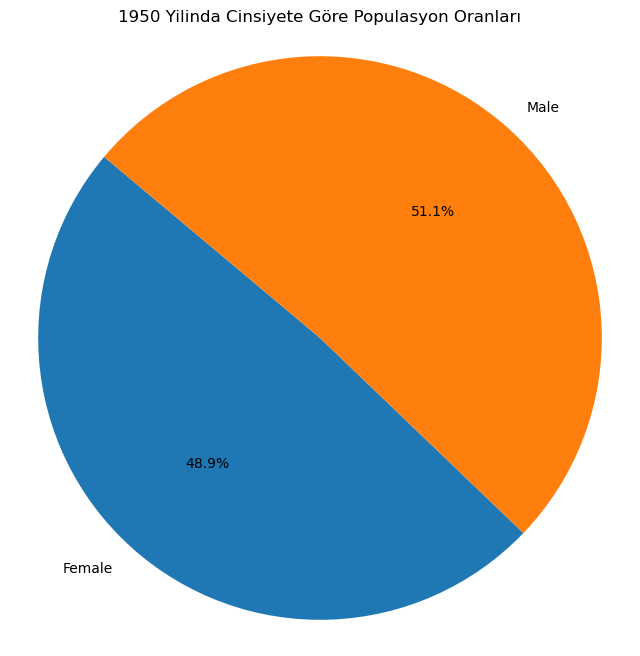

In [33]:
# We set our variables to the selected values from the dropdowns.
year = dropdown_year.value
age_group = dropdown_age_group.value
sex = dropdown_sex.value

# We exclude the 'Both sexes' category for the selected year and age group.
df_filtered_sex = df[(df["Sex"] != "Both sexes") & (df["Year"] == year) & (df["Age Group"] == age_group)]

# We calculate the total 'Value' for each sex within the selected year.
age_group_totals = df_filtered_sex.groupby("Sex")["Value"].sum()

# We plot a pie chart to visualize the population ratios by sex for the selected year.
plt.figure(figsize=(8, 8))
plt.pie(age_group_totals, labels=age_group_totals.index, autopct='%1.1f%%', startangle=140)
plt.title(f'{year} Yilinda Cinsiyete Göre Populasyon Oranları')
plt.axis('equal')  # This ensures our pie chart is a circle.
plt.show()


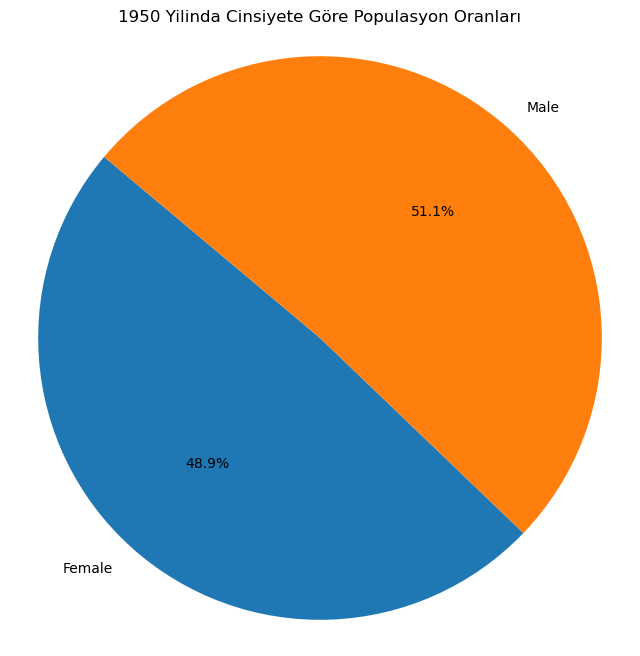

In [34]:
year = dropdown_year.value
age_group = dropdown_age_group.value
sex= dropdown_sex.value

# 'All ages' kategorisini hariç tut
df_filtered_sex = df[(df["Sex"] != "Both sexes") & (df["Year"] == year) & (df["Age Group"] == age_group)]

# Yaş gruplarına göre 'Value' toplamlarını hesapla
age_group_totals = df_filtered_sex.groupby("Sex")["Value"].sum()

# Pasta grafiğini çiz
plt.figure(figsize=(8, 8))
plt.pie(age_group_totals, labels=age_group_totals.index, autopct='%1.1f%%', startangle=140)
plt.title(f'{year} Yilinda Cinsiyete Göre Populasyon Oranları')
plt.axis('equal')  # Pasta grafiğini dairesel yap
plt.show()

## 3. One-Variable Analysis

In [36]:
# We assign a dataset where we can view the total annual population for 'Both sexes' across all age groups.
BothSexes_AllAges = df[(df["Sex"] == "Both sexes") & (df["Age Group"] == "All ages")]

# If we need to focus on the data starting from the year 2010, we can filter it with the following line.
# BothSexes_AllAges = BothSexes_AllAges[BothSexes_AllAges["Year"] >= 2010]

In [37]:
# We create a dataset that allows us to view the annual population for a specific age group
BothSexes_SpecificAge = df[(df["Age Group"] == "65 years and over") & (df["Sex"] == "Both sexes")]

In [40]:
# We filter the dataset to obtain only the entries where the age group is labeled as 'All ages'.
AllAges = df[(df["Age Group"] == "All ages")]

# Let's take a look at the filtered data.
#AllAges

In [39]:
# We're assigning the dataset to 'df_male' for entries where the age group is 'All ages' and sex is 'Male'.
df_male = df[(df["Age Group"] == "All ages") & (df["Sex"] == "Male")]

# Similarly, we're creating 'df_female' for entries where the age group is 'All ages' and sex is 'Female'.
df_female = df[(df["Age Group"] == "All ages") & (df["Sex"] == "Female")]

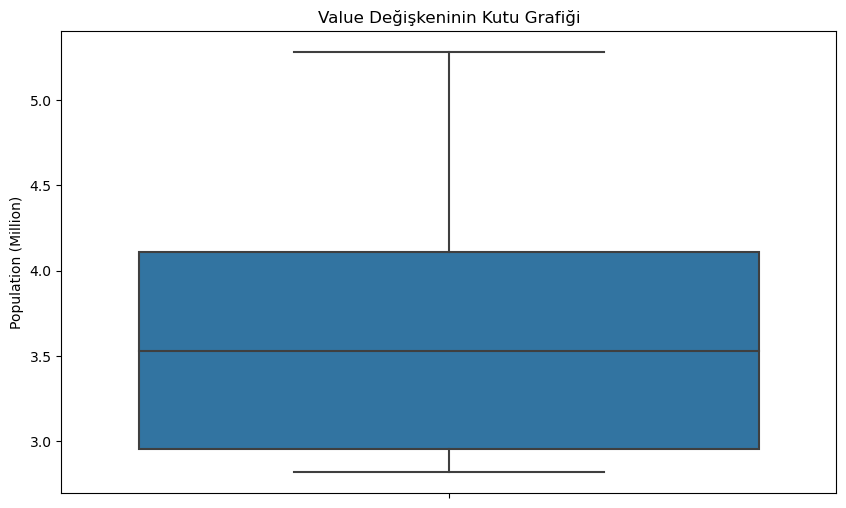

In [41]:
# We're plotting a boxplot for the 'Value' variable, which represents the annual total population.
plt.figure(figsize=(10, 6))  # We set the figure size to 10 by 6 inches for better visibility.
sns.boxplot(y=BothSexes_AllAges['Value'])  # We use seaborn's boxplot function, setting 'y' to the 'Value' column.
plt.title('Value Değişkeninin Kutu Grafiği')  # We add a title to the plot.
plt.ylabel('Population (Million)')  # We label the y-axis as 'Population (Million)'.
plt.show()  # We display the plot.

## 4. Two-Variable Analysis

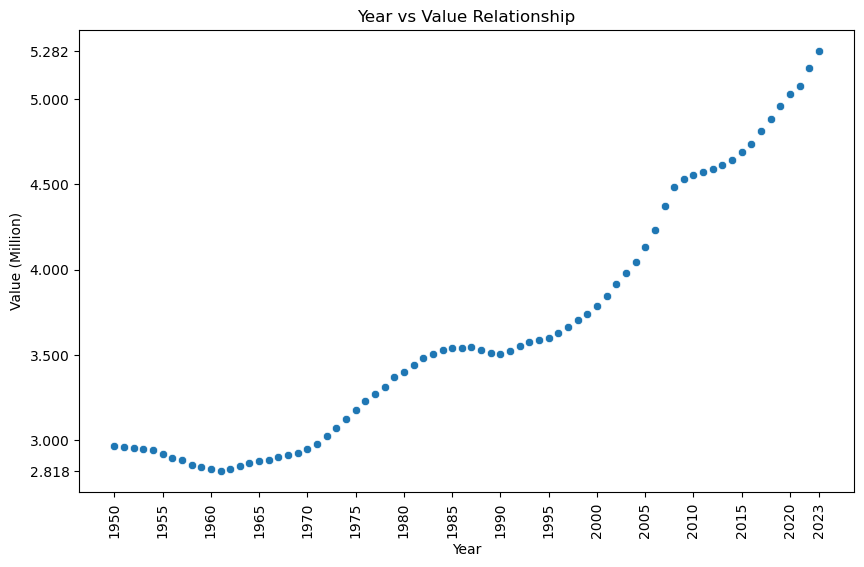

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

# Let's plot a scatter plot to see if there's any relationship between 'Year' and 'Value'.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=BothSexes_AllAges['Year'], y=BothSexes_AllAges['Value'])

# Grabbing the start and end years for our x-axis.
start_year = min(BothSexes_AllAges["Year"])
end_year = max(BothSexes_AllAges["Year"])
# Setting up our x-axis ticks to only show every fifth year for clarity.
years = list(range(start_year, end_year + 1, 5))
years.append(end_year)  # Adding the last year to the list of ticks.
plt.xticks(ticks=years, rotation=90)  # Rotate the labels for better readability.

# Time to round the y-values to make them neater.
step = 0.5  # This is the step size we're going for.
rounded_min_value = math.ceil(min(BothSexes_AllAges["Value"]) * 5) / 5
# Generating a range of y-ticks using our step size.
values = list(np.arange(rounded_min_value, round(max(BothSexes_AllAges["Value"]), 2), step))
values.insert(0, round(min(BothSexes_AllAges["Value"]), 3))  # Adding the smallest value.
values.append(round(max(BothSexes_AllAges["Value"]), 3))  # And now the largest.
plt.yticks(ticks=values)  # Setting the y-ticks using our generated list.

# Let's slap a title on there and label our axes.
plt.title('Year vs Value Relationship')
plt.xlabel('Year')
plt.ylabel('Value (Million)')
# Show the plot to the world!
plt.show()


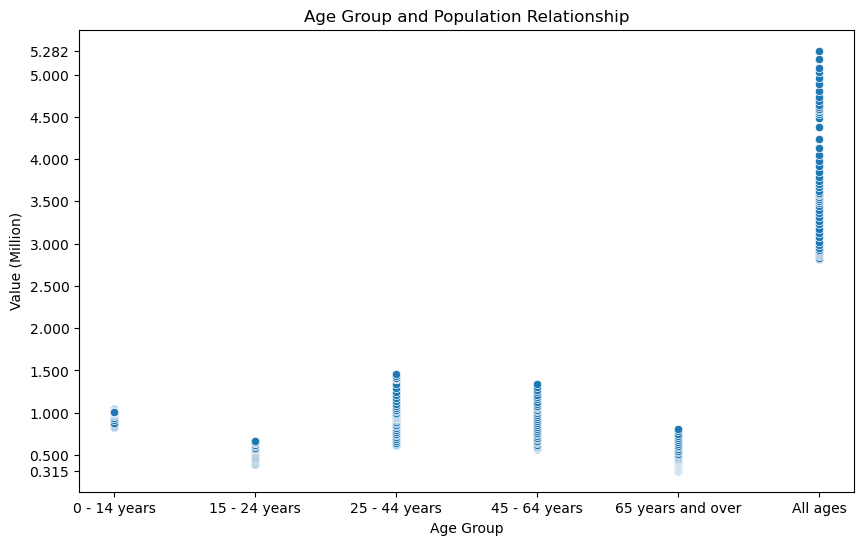

In [48]:
plt.figure(figsize=(10, 6)) # Set the figure size for the scatter plot

df_filtered_AgeGroup = df[(df["Sex"] == "Both sexes")] # Filter the DataFrame for entries where 'Sex' is 'Both sexes'

# Create a scatter plot with 'Age Group' on the x-axis and 'Value' on the y-axis
sns.scatterplot(x=df_filtered_AgeGroup['Age Group'], y=df_filtered_AgeGroup['Value'])

# Calculate the rounded minimum value for y-ticks based on the filtered data
# Multiply by 2 and divide by 2 for rounding to the nearest 0.5
rounded_min_value = math.ceil(min(df_filtered_AgeGroup["Value"]) * 2) / 2

step=0.5 # Set the step size for the y-tick intervals
# Create a list of y-tick values starting from the rounded minimum value to the maximum value with steps
values = list(np.arange(rounded_min_value, round(max(df_filtered_AgeGroup["Value"]), 2), step))
# Insert the actual minimum and maximum values into the list for accurate y-tick labels
values.insert(0, round(min(df_filtered_AgeGroup["Value"]), 3))
values.append(round(max(df_filtered_AgeGroup["Value"]), 3))


plt.yticks(ticks=values) # Set the y-tick values to the rounded values
plt.title('Age Group and Population Relationship') # Set the title of the scatter plot
plt.xlabel('Age Group') # Set the label for the x-axis
plt.ylabel('Value (Million)') # Set the label for the y-axis
plt.show() # Display the plot


<bound method Axes.set of <Axes: title={'center': 'Population Average by Age Group'}, xlabel='Age Group', ylabel='Average Population (Millions)'>>

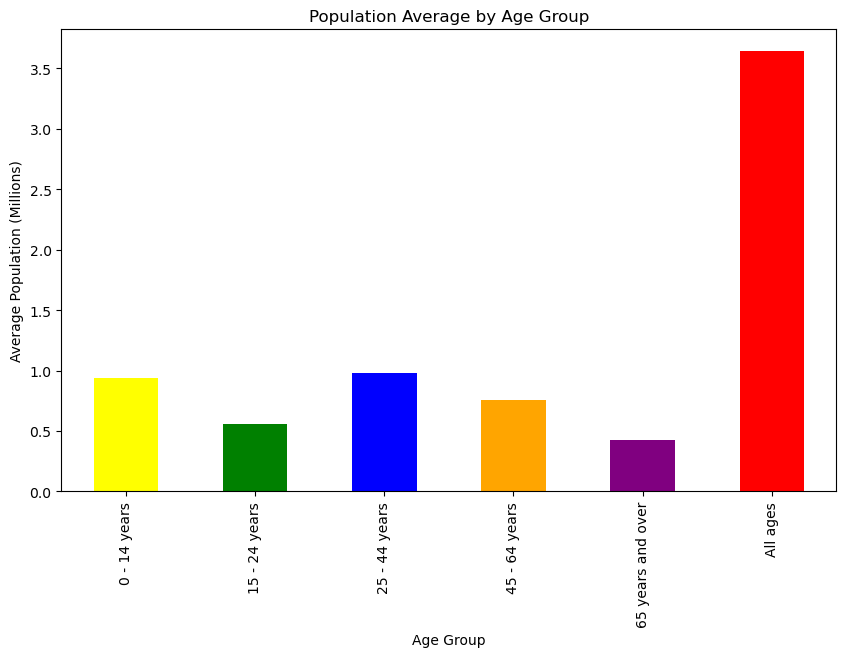

In [53]:
# Define a list of colors to be used in the plot
colors = ['yellow', 'green', 'blue', 'orange', 'purple','red']

# Filter the DataFrame for entries where 'Sex' is 'Both sexes' and for all age groups except 'All ages'
df_filtered_BothSexes = df[(df["Sex"]=="Both sexes")]

# Calculate the average 'Value' for each 'Age Group' category
grouped_data = df_filtered_BothSexes.groupby('Age Group')['Value'].mean()

# Create a bar plot using the colors defined earlier
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', ax=ax, color=colors)
# Set the title for the bar plot
ax.set_title("Population Average by Age Group")
ax.set_xlabel("Age Group")  # Set the x-axis label to 'Age Group'
ax.set_ylabel("Average Population (Millions)") # Set the y-axis label to 'Average Population (Millions)'
ax.set

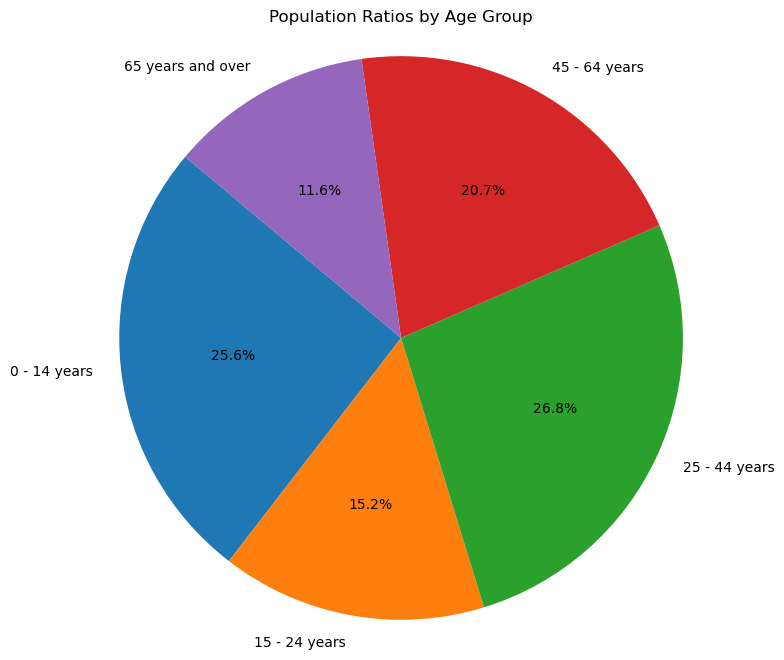

In [54]:
df_filtered_allages = df[df['Age Group'] != 'All ages'] # Exclude the 'All ages' category
age_group_totals = df_filtered_allages.groupby('Age Group')['Value'].sum() # Calculate the total 'Value' for each age group

# Plot a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size for the pie chart
plt.pie(age_group_totals, labels=age_group_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Population Ratios by Age Group')  # Set the title of the pie chart
plt.axis('equal')  # Ensure that pie chart is circular
plt.show()  # Display the plot

## 4. Three-Variable Analysis

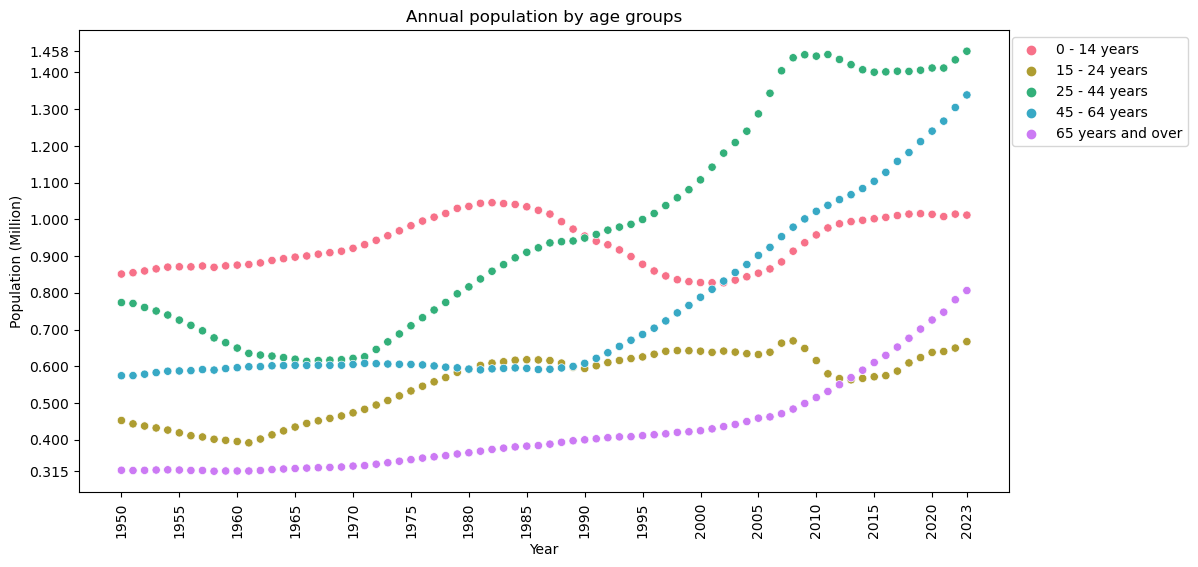

In [56]:
# Assigning a variable that excludes 'all ages' and includes 'both sexes'
filtered_df = df[(df["Sex"] == "Both sexes") & (df["Age Group"] != "All ages")]
plt.figure(figsize=(12,6))  # Set the figure size for the scatter plot

# Create a scatter plot with 'Year' on the x-axis and 'Value' on the y-axis
# Hue is used to color points by 'Age Group' and 'husl' is a color palette
sns.scatterplot(data=filtered_df, x="Year", y="Value", hue="Age Group", palette="husl")


start_year = min(filtered_df["Year"]) # We Determine the start years for the x-axis tick marks
end_year = max(filtered_df["Year"])   # We Determine the last years for the x-axis tick marks
years = list(range(start_year, end_year + 1, 5)) # We Generate a list of years at 5-year intervals plus the last year
years.append(end_year)
plt.xticks(ticks=years, rotation=90)  # Set the x-axis tick marks with a rotation for better readability

# Set up the rounding for the y-axis tick values
step = 0.1  # The step size for the y-axis tick
# Calculate the rounded minimum value, rounding up to the nearest step size
rounded_min_value = math.ceil(min(filtered_df["Value"]) * (1/step)) / (1/step)
# Generate a list of y-tick values from the rounded minimum to the maximum value with the defined step size
values = list(np.arange(rounded_min_value, round(max(filtered_df["Value"]), 2), step))
# Add the actual minimum and maximum values for the start and end of the y-axis ticks
values.insert(0, round(min(filtered_df["Value"]), 3))
values.append(round(max(filtered_df["Value"]), 3))
plt.yticks(ticks=values)  # Set the y-axis tick marks

# Add labels and title to the plot
plt.title("Annual population by age groups")  # The title of the scatter plot
plt.xlabel("Year")  # The label for the x-axis
plt.ylabel("Population (Million)")  # The label for the y-axis
# Place the legend outside the plot area to avoid covering the data points
plt.legend(loc="upper right", bbox_to_anchor=(1.2,1))
plt.show()  # Display the plot


In [ ]:
# Population distribution by years and sex
plt.figure(figsize=(12,6))
filtered_sex = df[(df["Sex"]!= "Both sexes") & (df["Age Group"] == "All ages")]
sns.scatterplot(data=filtered_sex,x="Year",y="Value",hue="Sex");

start_year = min(filtered_sex["Year"])
end_year = max(filtered_sex["Year"])
years = list(range(start_year, end_year + 1, 5))
years.append(end_year)
plt.xticks(ticks=years, rotation=90)

#Yıl değerlerinin doğru bir şekilde yuvarlanması.
step = 0.2  # Belirlediğiniz adım büyüklüğü
rounded_min_value = math.ceil(min(filtered_sex["Value"]) * 10) / 10
values = list(np.arange(rounded_min_value, round(max(filtered_sex["Value"]), 2), step))
values.insert(0,round(min(filtered_sex["Value"]),3))
values.append(round(max(filtered_sex["Value"]),3))
plt.yticks(ticks=values)

#plt.xticks(rotation=90);
plt.ylabel("Value (Million)")
plt.legend(loc="upper right",bbox_to_anchor=(1.16,1.02));

# Autliers

In [58]:
# Filter the DataFrame for entries where 'Age Group' is "65 years and over" and 'Sex' is "Both sexes"
filtered_age_group = df[(df["Age Group"] == "65 years and over") & (df["Sex"] == "Both sexes")]

Q1 = filtered_age_group["Value"].quantile(0.25) # Calculate the first quartile (Q1) of the 'Value' column
Q3 = filtered_age_group["Value"].quantile(0.75) # Calculate the third quartile (Q3) of the 'Value' column
IQR = Q3 - Q1 # Calculate the Interquartile Range (IQR) as the difference between Q3 and Q1

lower_bound = Q1 - 1.5 * IQR # Determine the lower bound for outlier detection
upper_bound = Q3 + 1.5 * IQR # Determine the upper bound for outlier detection

print("IQR:", IQR, "(Million)") # Print out the IQR value, appending the unit "(Million)" for clarification

IQR: 0.13142500000000001 (Million)


In [61]:
# Create a boolean Series where True indicates the presence of an outlier
outliers = (filtered_age_group["Value"] < lower_bound) | (filtered_age_group["Value"] > upper_bound)
outliers_age_group = filtered_age_group[outliers] # Filter the 'filtered_age_group' DataFrame to include only the outliers
outliers_list = outliers_age_group["Value"][outliers].tolist() # Create a list of the 'Value' column for the outliers

outliers_list # Return the list of outliers

[0.6764, 0.7014, 0.7261, 0.7474, 0.7813, 0.8062999999999999]

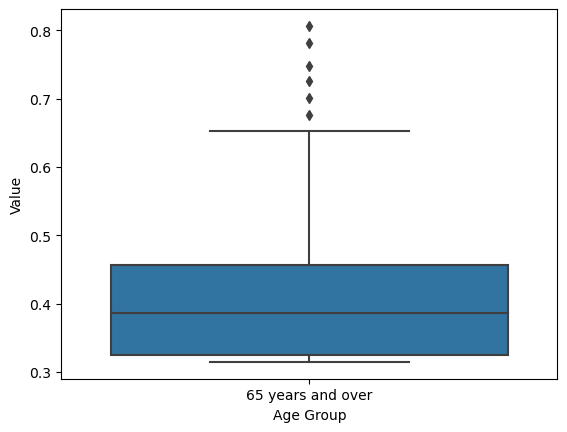

In [62]:
# Creates a boxplot for the 'Value' column segmented by 'Age Group'
sns.boxplot(x="Age Group", y="Value", data=filtered_age_group)
plt.show() # Displays the plot.

# Binomial Distribution

In [65]:
threshold_value = upper_bound # Define the outlier threshold

# Calculate the probability of having an outlier for a specific year, age group, and sex
n = filtered_age_group["Value"].count()  # Total number of observations
p = len(filtered_age_group[filtered_age_group["Value"] > threshold_value]) / n  # Probability of being an outlier

# Specify the number of outliers you want to calculate the probability for
x = 1

# Use the binomial distribution to calculate the probability
probability = binom.pmf(x, n, p)

# Print the result
print(f"Total number of observations: {n}\nProbability of being an outlier: {p}\n")
print(f"The probability of having {x} outlier(s) in a particular year, age group, and gender: {probability:.4f}")


Total number of observations: 74
Probability of being an outlier: 0.08108108108108109

The probability of having 1 outlier(s) in a particular year, age group, and gender: 0.0125


# Poisson

In [ ]:
# Calculate the average rate of occurrence (mean) for a specific year, age group, and sex
# from the 'Value' column of the filtered_age_group DataFrame.
average_event_rate = filtered_age_group["Value"].mean()

# Specify the number of rare events you're interested in
x = 2

# Calculate the probability using the Poisson distribution
# The Poisson PMF calculates the probability of observing exactly x events
# when the average number of events is 'average_event_rate'.
probability = poisson.pmf(x, average_event_rate)

# Print the result
print(f"The probability of observing exactly {x} rare events in a specific year, age group, and sex: {probability:.4f}")

In [66]:
# Calculate the average rate of occurrence (mean) from the 'Value' column
average_event_rate = filtered_age_group["Value"].mean()

# To calculate the probability of at least one outlier, you need to find the probability
# of zero outliers and subtract it from one (using the complement rule).
x = 0  # We're interested in the probability of not having zero outliers, hence x = 0.

# Calculate the probability using the Poisson CDF.
# The Poisson CDF at x gives the probability of observing x or fewer events.
# So, `1 - poisson.cdf(x, average_event_rate)` gives us the probability of more than x events.
probability = 1 - poisson.cdf(x, average_event_rate)

# Print out the probability of having at least one outlier
print(f"The probability of having at least one outlier in a specific year, age group, and sex: {probability:.4f}")

The probability of having at least one outlier in a specific year, age group, and sex: 0.3456


# Normal Distribution

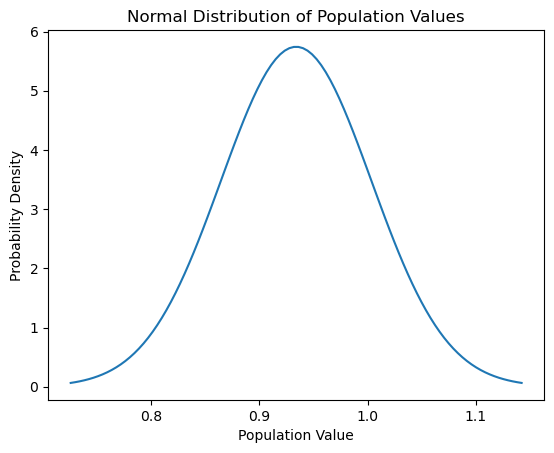

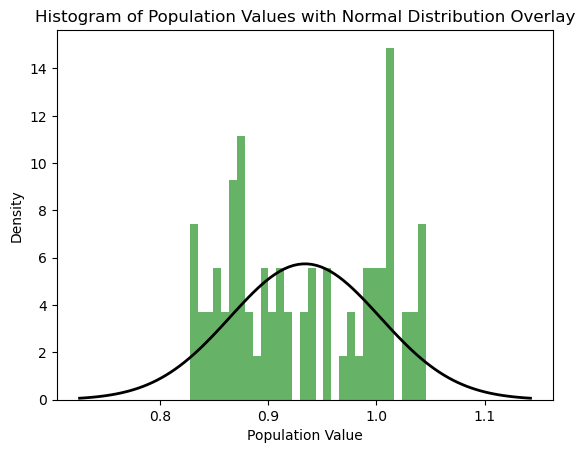

In [68]:
from scipy.stats import norm

# Calculate the mean and standard deviation for the 'Value' column
selected_age_group = '0 - 14 years'  # Define the age group of interest
selected_sex = 'Both sexes'  # Define the sex category of interest
selected_df = df[(df['Age Group'] == selected_age_group) & (df['Sex'] == selected_sex)]  # Filter the dataframe for the selected age group and sex
mean_value = selected_df['Value'].mean()  # Calculate the mean of the 'Value' column
std_value = selected_df['Value'].std()  # Calculate the standard deviation of the 'Value' column

# Plot the normal distribution graph
x = np.linspace(mean_value - 3*std_value, mean_value + 3*std_value, 100)  # Create an array of x values covering ±3 standard deviations around the mean
y = norm.pdf(x, mean_value, std_value)  # Calculate the normal distribution's probability density (y values)

plt.plot(x, y)  # Plot the normal distribution curve
plt.title('Normal Distribution of Population Values')  # Set the title of the plot
plt.xlabel('Population Value')  # Label the x-axis
plt.ylabel('Probability Density')  # Label the y-axis
plt.show()  # Display the plot

# Additionally, plot a histogram of the 'Value' column to compare with the normal distribution
plt.hist(selected_df['Value'], bins=30, density=True, alpha=0.6, color='g')  # Plot the histogram with the density flag to match the normal distribution scale
plt.plot(x, y, 'k', linewidth=2)  # Plot the normal distribution curve on top of the histogram
plt.title('Histogram of Population Values with Normal Distribution Overlay')  # Set the title of the histogram plot
plt.xlabel('Population Value')  # Label the x-axis
plt.ylabel('Density')  # Label the y-axis
plt.show()  # Display the plot


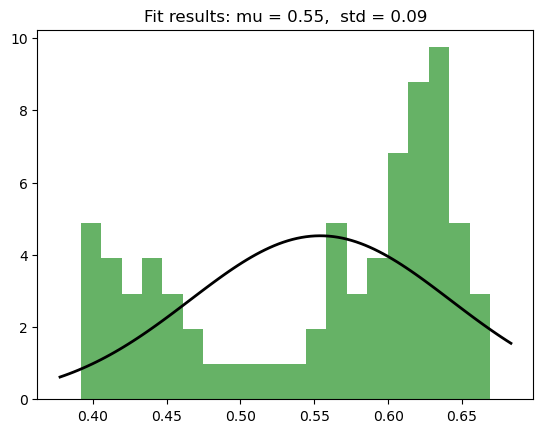

In [70]:
from scipy import stats

# Select a specific age group and sex category:
selected_age_group = '15 - 24 years'  # Define the age group of interest.
selected_sex = 'Both sexes'  # Define the sex category of interest.
selected_df = df[(df['Age Group'] == selected_age_group) & (df['Sex'] == selected_sex)]  # Filter the DataFrame for the selected age group and sex.

# Plot a histogram of the 'Value' column
plt.hist(selected_df['Value'], bins=20, density=True, alpha=0.6, color='g')  # Plot the histogram with 20 bins and density true to get the probability density.

# Calculate the mean and standard deviation to obtain the normal distribution curve
mn, std = stats.norm.fit(selected_df['Value'])  # Fit a normal distribution to the 'Value' data and get the mean (mn) and standard deviation (std).

# Calculate the minimum and maximum values to plot the normal distribution curve
xmin, xmax = plt.xlim()  # Get the current limits for the x-axis.
x = np.linspace(xmin, xmax, 100)  # Generate 100 linearly spaced points between xmin and xmax.
p = stats.norm.pdf(x, mn, std)  # Compute the probability density function for a normal distribution.

# Add the curve to the plot
plt.plot(x, p, 'k', linewidth=2)  # Plot the normal distribution curve on top of the histogram with a black line.
title = "Fit results: mu = %.2f,  std = %.2f" % (mn, std)  # Create a title string that includes the mean and standard deviation.
plt.title(title)  # Set the title of the plot.

plt.show()  # Display the plot.


# Adım 5: Makine Öğrenimi için Veri Hazırlığı

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler


## Adım 1: Kategorik Değişkenler İçin One-Hot Encoding Uygulama

In [ ]:
# 'Age Group' ve 'Sex' sütunları için One-Hot Encoding uygulayalım
onehot_encoder = OneHotEncoder(sparse=False)
encoded_features = onehot_encoder.fit_transform(df[['Age Group', 'Sex']])

# One-hot encoded verileri DataFrame'e dönüştürelim
encoded_df = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out(['Age Group', 'Sex']))

# Orijinal DataFrame ile encoded_df DataFrame'ini birleştirelim
df = df.join(encoded_df)

# Orjinal kategorik sütunları silelim
df = df.drop(['Age Group', 'Sex'], axis=1)


## Adım 2: Veri Setini Eğitim ve Test Seti Olarak Ayırma

In [ ]:
# DataFrame'deki tüm sütun adlarını listele
print(df.columns)

In [ ]:
# Veri setini X ve y olarak ayıralım
X = df.drop('Value', axis=1)  # 'target_column' hedef sütunun ismiyle değiştirilmeli
y = df['Value']

# Eğitim ve test setlerini ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Adım 3: Veri Normalizasyonu veya Standardizasyonu

In [ ]:
# StandardScaler veya MinMaxScaler kullanabiliriz

# Standardizasyon için:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# veya Normalizasyon için:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Hedef ve özellikleri belirleyin
y = df['Value']  # Hedef değişken
X = df.drop(['Value'], axis=1)  # Özellikler

# Veri setini eğitim ve test seti olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veri normalizasyonu/standardizasyonu (gerekiyorsa)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeli oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Tahmin yapma
y_pred = model.predict(X_test_scaled)

# Model performansını değerlendirme
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

# Hiperparametre ayarlama için GridSearchCV
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# En iyi modelle tahmin yapma
y_pred_best = best_model.predict(X_test_scaled)

# En iyi modelin performansını değerlendirme
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Model MSE: {mse_best}')
print(f'Best Model R2 Score: {r2_best}')


## Random Forest için GridSearchCV kullanarak hiperparametre ayarlaması yapmak

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Hiperparametreler için grid tanımı
param_grid = {
    'n_estimators': [100, 200, 300],  # Ağaç sayısını denemek için
    'max_depth': [None, 5, 10, 15],   # Maksimum derinlik için
    'min_samples_split': [2, 5, 10],   # Düğümü bölmek için minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4]      # Bir yaprağın minimum örnek sayısı
}

# Random Forest Regressor için GridSearchCV oluşturma
rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Eğitim veri seti ile GridSearchCV fit etme
grid_search_rf.fit(X_train_scaled, y_train)

# En iyi parametreleri ve modeli bulma
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

print("Random Forest için en iyi parametreler:", best_params_rf)

# En iyi modelle tahmin yapma ve performansı değerlendirme
y_pred_rf = best_model_rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R2 Score: {r2_rf}')
